# Step-1 Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,5)
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Step-2 Loading dataset

In [2]:
df=pd.read_csv('bookings.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

# Step-3 EDA on our Data

# For better understanding we explore :
1.  Top 10 Countries of Origin of Hotel visitors (Guests)
2.  Which Month is the Most Occupied (busiest) with bookings at the Hotel
3.  How many bookings were cancelled at the Hotel
4.  Which month has highest number of cancellations
5.  How many bookings were cancelled by Hotel Type
6.  Relationship between ADR and Arrival month by booking cancellation status 
7.  Total number of bookings for each hotel
8.  Total number of bookings by Market Segment
9.  Total number of bookings by Customer type
10. Arrival_date_year vs lead_time with booking cancellation status.
11. Total Number of Special requests 
12. Relationship between total special requests and cancellations
13. Total nights spent at Hotels by Market Segment and Hotel Type
14. How does the Price Per Night (ADR) Vary Over the Year by Hotel Type
15. What is the effect of repeated guest on Cancellations
16. Total Number of bookings by deposit type
17. What is the Effect of deposit type on Cancellations
18. What is the Effect of Meal type on Cancellations
19. What is the Effect of required_car_parking_spaces on Cancellations
20. What is the Effect of booking changes (Modifications) on Cancellations

# 1.Top 10 Countries of origin of Hotel Visitors(Guests)

In [5]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
MDG        1
MMR        1
VGB        1
BWA        1
NAM        1
Name: country, Length: 177, dtype: int64

Text(0, 0.5, 'Reservation Count')

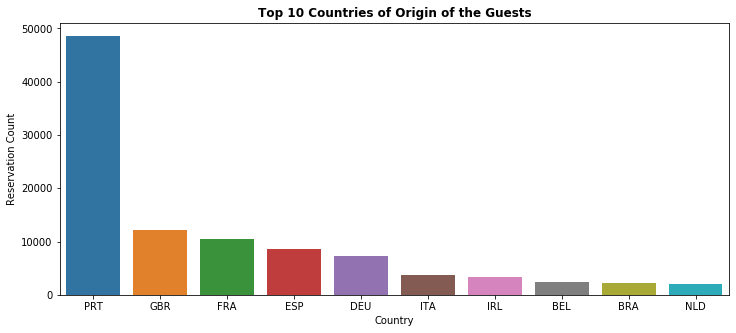

In [6]:
sns.countplot(x='country',data=df,order=df['country'].value_counts().iloc[:10].index,palette=None)
plt.title('Top 10 Countries of Origin of the Guests', weight='bold')
plt.xlabel('Country')
plt.ylabel('Reservation Count')

 The countplot shows that PRT country has highest bookings followed by Great Britain and France

#   2.Which Month is the Most Occupied  with bookings at the Hotel

In [7]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [8]:
ordered_months=['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month']=pd.Categorical(df['arrival_date_month'],categories=ordered_months,ordered=True)

Text(0, 0.5, 'Bookings')

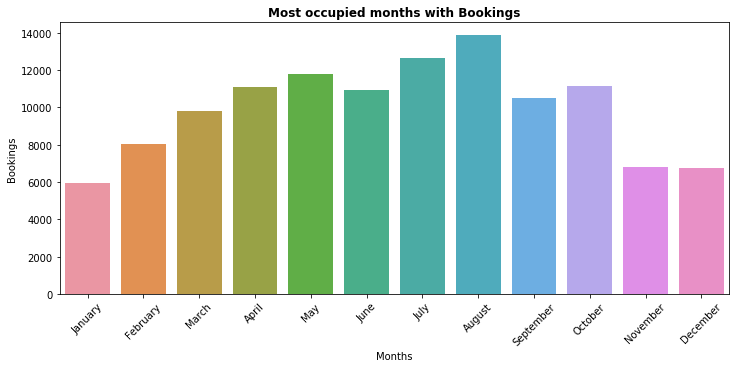

In [9]:
sns.countplot(x='arrival_date_month',data=df)
plt.title('Most occupied months with Bookings', weight='bold')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.ylabel('Bookings')


From plot we can understand that , August has highest bookings followed by July,May

# 3.How many bookings were cancelled at the Hotel

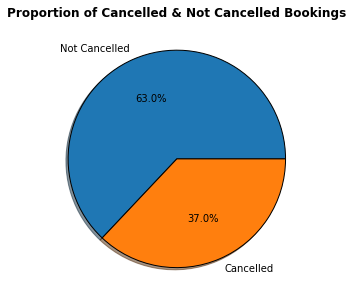

In [10]:

proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings',weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'})
plt.show()

 The above piechart shows that about 63% are not cancelled and 37% are cancelled at Hotel 

# 4.Which month has highest number of cancellations

In [11]:
ordered_months=['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month']=pd.Categorical(df['arrival_date_month'],categories=ordered_months,ordered=True)


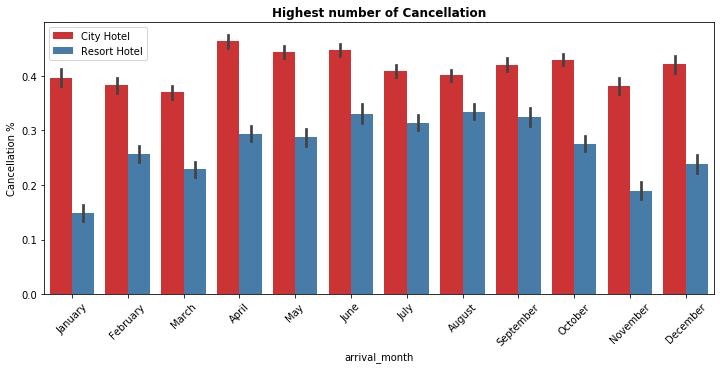

In [58]:
sns.barplot(x="arrival_date_month",y="is_canceled",hue="hotel",hue_order=["City Hotel","Resort Hotel"],data=df,palette="Set1")
plt.title('Highest number of Cancellation',weight='bold')
plt.xlabel('arrival_month')
plt.xticks(rotation=45)
plt.ylabel('Cancellation %')
plt.legend(loc='upper left')
plt.show()

From the above plots we can observe that April has the highest cancellations for City hotel ,while June and August have highest cancellations for Resort hotel

# 5.How many bookings were cancelled by Hotel Type

In [13]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Text(0, 0.5, 'Reservation Count')

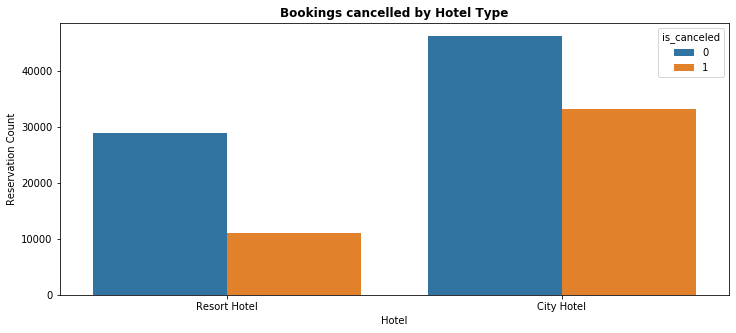

In [14]:
sns.countplot(x='hotel',hue='is_canceled',data=df,palette=None)
plt.title('Bookings cancelled by Hotel Type', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

###  City hotels occupy more than resort hotel

# 6.Relationship between ADR and Arrival month by booking cancellation status

In [15]:
df['adr'].value_counts()

62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
202.74       1
87.64        1
69.83        1
160.83       1
35.64        1
Name: adr, Length: 8879, dtype: int64

In [16]:
ordered_months=['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month']=pd.Categorical(df['arrival_date_month'],categories=ordered_months,ordered=True)

Text(0, 0.5, 'Average Daily Rate')

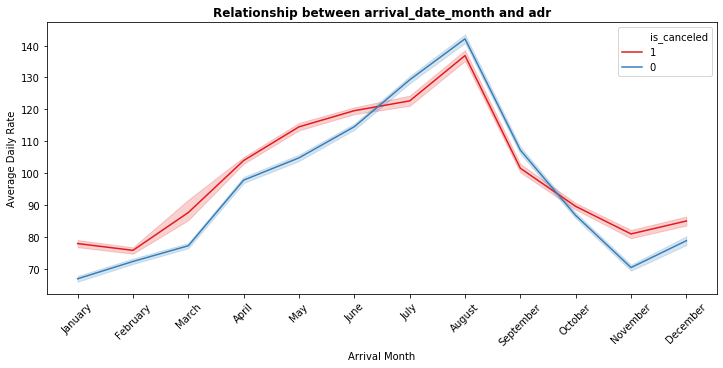

In [17]:
sns.lineplot(x='arrival_date_month',y='adr',hue='is_canceled',hue_order=[1,0],data=df,palette='Set1')
plt.title('Relationship between arrival_date_month and adr',weight='bold')
plt.xlabel('Arrival Month')
plt.xticks(rotation=45)
plt.ylabel('Average Daily Rate')

#### The line chart shows August has highest bookings and also highest cancellation rate

## 7.Total number of bookings for each Hotels

In [18]:
df['hotel'].value_counts(normalize=True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

Text(0, 0.5, 'Reservation Count')

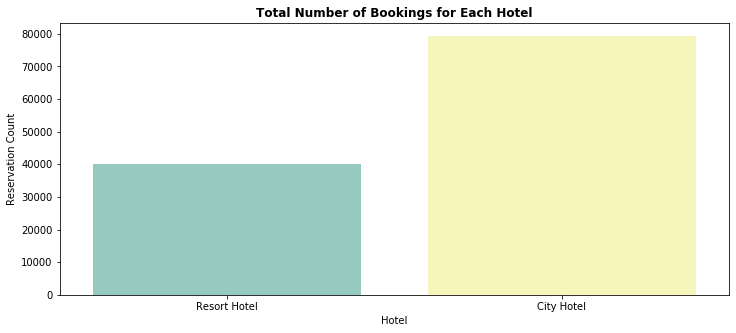

In [19]:
sns.countplot(x='hotel', data = df, palette='Set3')
plt.title('Total Number of Bookings for Each Hotel', weight='bold')
plt.xlabel('Hotel')
plt.ylabel('Reservation Count')

#### From above plot we can see City hotel has highest number of bookings

## 8. Total number of bookings by Market Segment

In [20]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

Text(0, 0.5, 'Reservation Count')

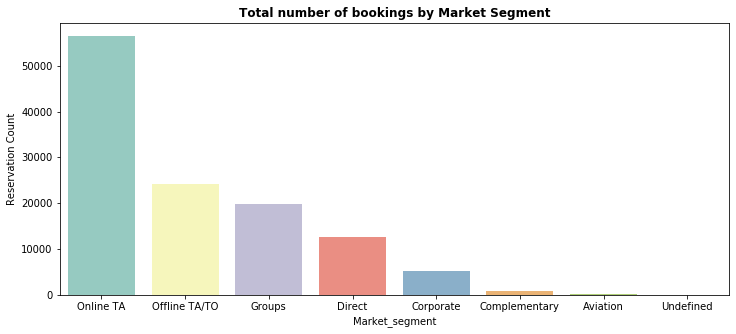

In [21]:
sns.countplot(df['market_segment'], palette='Set3',order=pd.value_counts(df['market_segment']).index)
plt.title('Total number of bookings by Market Segment',weight='bold')
plt.xlabel('Market_segment')
plt.ylabel('Reservation Count')

#### The plot shows that most of the bookings are done by Online TA and followed by offline and Groups

## 9.Total bookings by Customer type

In [22]:
df['customer_type'].value_counts(normalize=True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

Text(0, 0.5, 'Reservation Count')

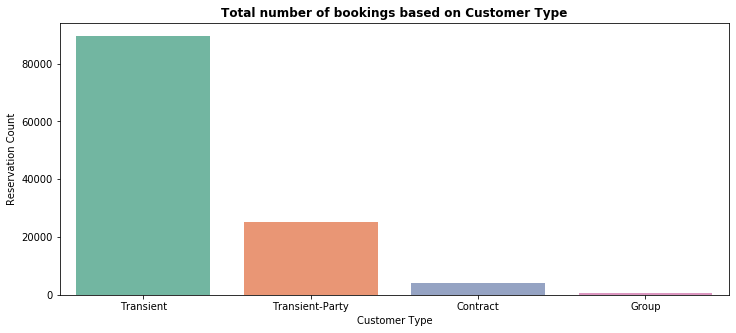

In [23]:
sns.countplot(df['customer_type'], palette='Set2',order=pd.value_counts(df['customer_type']).index)
plt.title('Total number of bookings based on Customer Type',weight='bold')
plt.xlabel('Customer Type')
plt.ylabel('Reservation Count')

#### The above graph indicates most of the bookings were Transient and followed by Transient-Party

## 10.Arrival_date_year vs lead_time with booking cancellation status.

Text(0, 0.5, 'Lead Time')

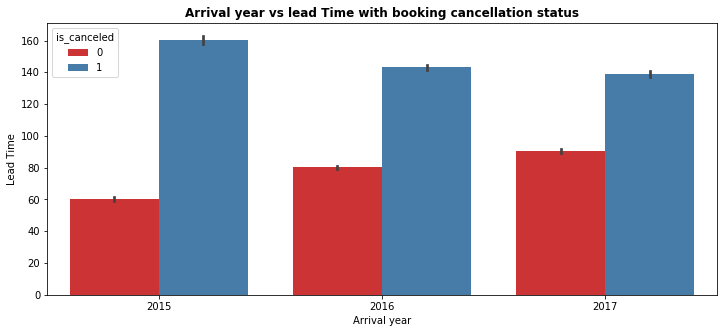

In [24]:
sns.barplot(x='arrival_date_year',y='lead_time',hue='is_canceled',data=df,palette='Set1')
plt.title('Arrival year vs lead Time with booking cancellation status',weight='bold')
plt.xlabel('Arrival year')
plt.ylabel('Lead Time')

#### For all the 3 years, bookings with lead time less than 100 days has less chances of getting cancelled
#### For all the 3 years, bookings with lead time more than 100 days has more chances of getting cancelled

# 11.Total Number of Special requests

In [25]:
df['total_of_special_requests'].value_counts(normalize=True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

Text(0, 0.5, 'Reservation Count')

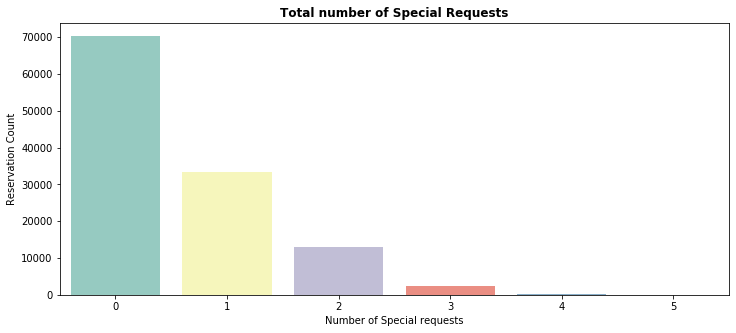

In [26]:
sns.countplot(df['total_of_special_requests'],data=df,palette='Set3')
plt.title('Total number of Special Requests',weight='bold')
plt.xlabel('Number of Special requests')
plt.ylabel('Reservation Count')

#### Most of the guests have no special requests

# 12.Relationship between total special requests and cancellations

In [27]:
pd.crosstab(df['is_canceled'],df['total_of_special_requests'],normalize= True)

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,0.307915,0.217003,0.084622,0.017179,0.002546,0.000318
1,0.281062,0.061295,0.024005,0.003736,0.000302,0.000017


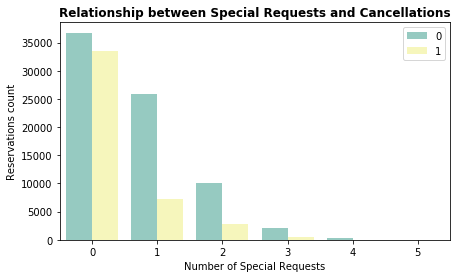

In [28]:
plt.figure(figsize = (7,4))
sns.countplot(x = "total_of_special_requests", hue = "is_canceled",data=df,palette= 'Set3')
plt.title("Relationship between Special Requests and Cancellations", weight = 'bold')
plt.xlabel("Number of Special Requests")
plt.ylabel("Reservations count")
plt.legend(loc="upper right")
plt.show()

- **The Above graph depicts the relationship between total number of special requests and cancellation booking status.**
- **Around 28% of bookings were cancelled with no special requests from the guests followed by 6% bookings were cancelled with one special requests from the guests.**

### 13.Total nights spent at Hotels by Market Segment and Hotel Type

In [29]:
df['total_stay']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

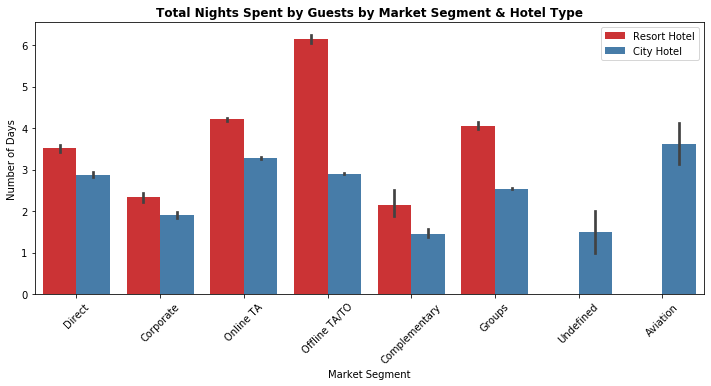

In [30]:
sns.barplot(x='market_segment',y='total_stay',hue='hotel',data=df,palette='Set1')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.xticks(rotation='45')
plt.ylabel('Number of Days')
plt.legend(loc = "upper right")

- **For City hotel, most of guests prefer to stay between 1-4 nights.**
- **For Resort hotel, most of the guests prefer to stay more than 3 nights. It is obvious that when guests go to resort hotels, they prefer to stay for longer days.**
- **Guests from Aviation Segment do not seem to be staying at the Resort hotels**

## 14.How does the Price Per Night (ADR) Vary Over the Year by Hotel Type

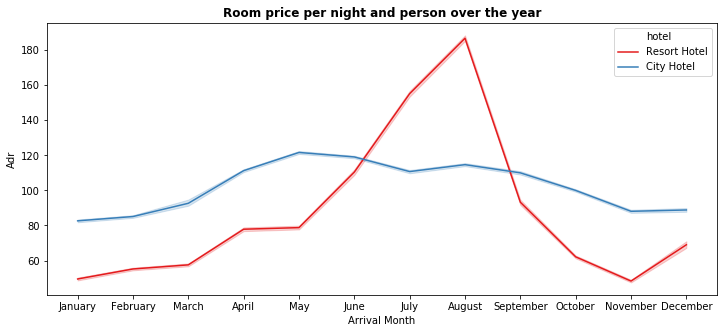

In [31]:
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df,palette='Set1')
plt.title('Room price per night and person over the year',weight='bold')
plt.xlabel('Arrival Month')
plt.ylabel('Adr')
plt.show()

- **For Resort Hotel, the price per night (ADR) is more expensive during July, August & September**
- **For City Hotel, the price per night (ADR) is slightly more during March, April & May**

## 15.What is the effect of repeated guest on Cancellations

In [32]:
pd.crosstab(df['is_repeated_guest'],df['is_canceled'],normalize=True)

is_canceled,0,1
is_repeated_guest,,
0,0.602295,0.365793
1,0.027289,0.004624


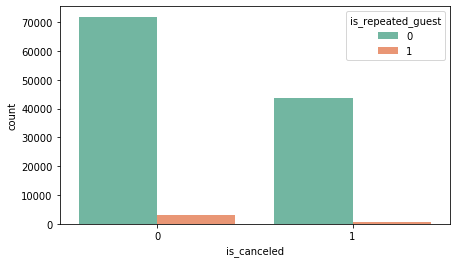

In [33]:
plt.figure(figsize=(7,4))
sns.countplot(x= 'is_canceled',hue = 'is_repeated_guest',data = df,palette= 'Set2')

- **From the above graph, we can depict that most of the repeated guests do not cancel their reservations and its obvious.**

**16. Total Number of bookings by deposit type**

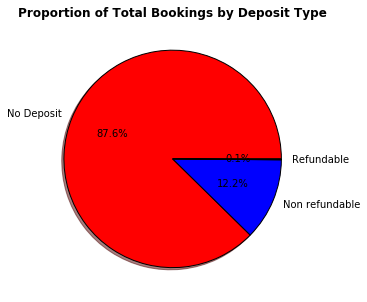

In [34]:
prop=df['deposit_type'].value_counts()
labels=['No Deposit','Non refundable','Refundable']
plt.title('Proportion of Total Bookings by Deposit Type',weight = 'bold')
cols=['red','blue','green']
plt.pie(prop,labels=labels,shadow=True,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'},colors=cols)
plt.show()


**17. What is the Effect of Deposit Type on Cancellations**

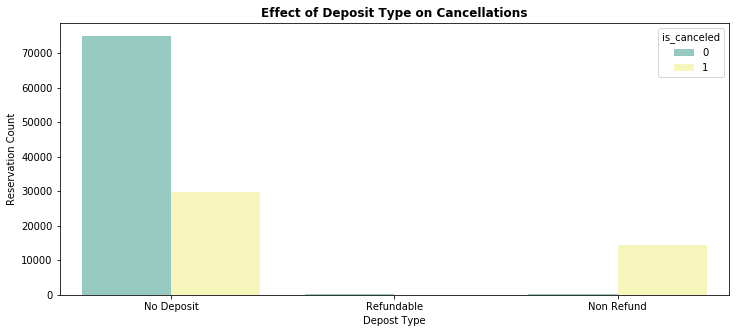

In [38]:
sns.countplot(x='deposit_type',hue='is_canceled',data=df,palette='Set3')
plt.title('Effect of Deposit Type on Cancellations',weight = 'bold')
plt.xlabel('Depost Type')
plt.ylabel('Reservation Count')
plt.show()

- **Around 28% bookings were cancelled by guests with no deposit, followed by 22% bookings were cancelled which are with Refundable policy**
- **So its obvious that guests who do not pay any deposit while booking are likely to cancel more reservations**

**18. What is the Effect of Meal type on Cancellations**

Text(0, 0.5, 'Reservation count')

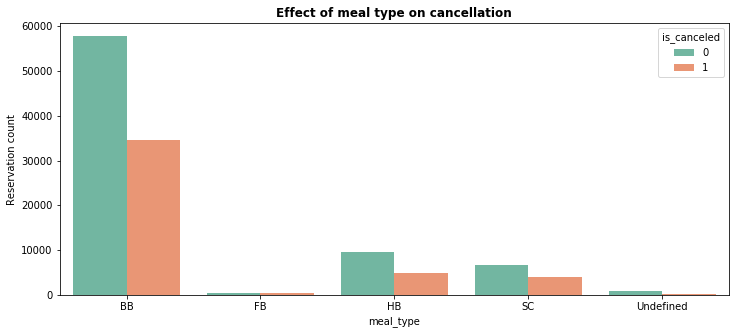

In [42]:
sns.countplot(x='meal',hue='is_canceled',data=df,palette='Set2')
plt.title('Effect of meal type on cancellation',weight='bold')
plt.xlabel('meal_type')
plt.ylabel('Reservation count')

- **From the graph we can depict that more number of reservations are booked by the guest for "Bed & Breakfast" meal type.**
- **Around 37% bookings of "BB" meal type were cancelled by the guests.**

**19. What is the effect of Required_car_parking_spaces on Cancellations**

Text(0, 0.5, 'Reservation count')

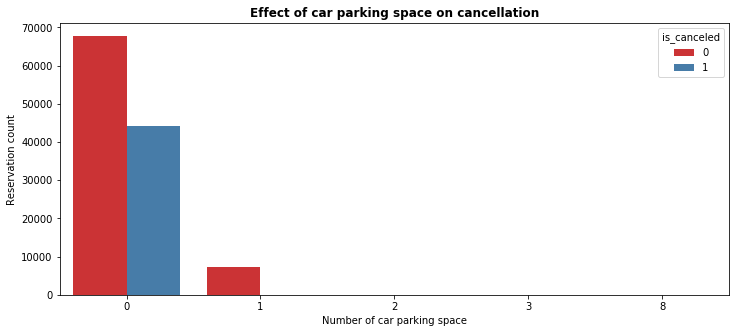

In [46]:
sns.countplot(x='required_car_parking_spaces',hue='is_canceled',data=df,palette='Set1')
plt.title('Effect of car parking space on cancellation',weight='bold')
plt.xlabel('Number of car parking space')
plt.ylabel('Reservation count')

In [48]:
order=pd.value_counts(df['booking_changes']).iloc[:5].index


Int64Index([0, 1, 2, 3, 4], dtype='int64')


- **Around 40% bookings were cancelled by guests who didnt opt for Car parking at the time of booking**

**20. What is the Effect of Booking Changes (Modifications) on Cancellations**

Text(0, 0.5, 'Reservation Count')

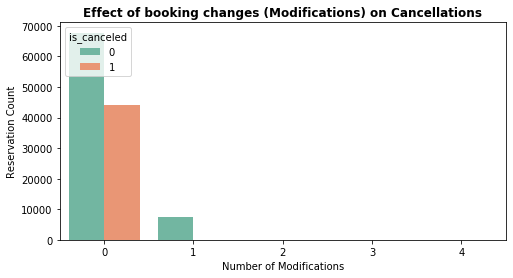

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(x='required_car_parking_spaces',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue='is_canceled',data=df,palette='Set2')
plt.title ('Effect of booking changes (Modifications) on Cancellations',weight = 'bold')
plt.xlabel("Number of Modifications")
plt.ylabel('Reservation Count')


- **Around 40% of bookings were cancelled by the guests when no modifications done**
- **Around 14% of bookings were cancelled by the guests when one modifications was done**

## Summary

**From our EDA, we have observed that the top 5 most important features in the data set which helps in predicting Cancellations are:**

1. Lead Time 
2. ADR 
3. Deposit Type
4. Arrival Day of the Month
5. Total Number of Special Requests.

### Stratagies to Counter High Cancellations at the hotel

1. Set Non-refundable Rates, Collect deposits and implementing more rigid cancellation policies
2. Using Advanced Purchase Rates with varying Lead Time windows
3. Encourage direct bookings by offering discounts
4. Hotels can take into account of total number of special requests to reduce the possibility of cancellations by improving customer service
5. Monitor where the cancellations are coming from such as Market Segment, distribution channels etc

### References

1. https://www.pegs.com/blog/how-hotels-can-counter-high-ota-cancellation-rates/
2. https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/
3. https://www.kaggle.com/jessemostipak/hotel-booking-demand